In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import json

In [6]:
data = pd.read_json('../data/raw/food-inspection.json')

In [7]:
data.head(5)

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,1.0,21569.0,36.0,261.0,32.0,2215 S KEDZIE AVE,PALETERIA JUAREZ,CHICAGO,PALETERIA JUAREZ,MOBILE DESSERTS VENDOR,2019-03-22T00:00:00.000,2279882,License,41.851283,2211322,"{'type': 'Point', 'coordinates': [-87.70509219...",-87.705092,Not Ready,Risk 3 (Low),IL,None,60623.0
1,46.0,14926.0,41.0,148.0,37.0,1009-1011 N ORLEANS ST,ORIGINAL PAKIZA INC.,CHICAGO,ORIGINAL PAKIZA INC.,Restaurant,2019-03-22T00:00:00.000,2279851,Complaint Re-Inspection,41.900828,2609221,"{'type': 'Point', 'coordinates': [-87.63718892...",-87.637189,Pass,Risk 1 (High),IL,None,60610.0
10,41.0,22535.0,24.0,180.0,23.0,2533-37 W HOMER ST,THE JOINERY,CHICAGO,THE JOINERY STUDIOS,EVENT VENU,2019-03-22T00:00:00.000,2279857,License Re-Inspection,41.916527,2636637,"{'type': 'Point', 'coordinates': [-87.69116687...",-87.691167,Pass,Risk 3 (Low),IL,None,60647.0
100,44.0,22615.0,52.0,77.0,19.0,6317 W GRAND AVE,PALETERIA CARRUCEL,CHICAGO,PALETERIA CARRUCEL,Mobile Frozen Desserts Vendor,2019-03-20T00:00:00.000,2279706,License,41.921990,2385445,"{'type': 'Point', 'coordinates': [-87.78370990...",-87.783710,Pass,Risk 3 (Low),IL,None,60639.0
101,11.0,22620.0,16.0,109.0,25.0,1209 - 1213 N NOBLE ST,WARM BELLY BAKERY,CHICAGO,WARM BELLY BAKERY,None,2019-03-20T00:00:00.000,2279730,License,41.903725,2653357,"{'type': 'Point', 'coordinates': [-87.66247406...",-87.662474,Not Ready,Risk 1 (High),IL,None,60642.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
:@computed_region_43wa_7qmu    978 non-null float64
:@computed_region_6mkv_f3dw    992 non-null float64
:@computed_region_awaf_s7ux    978 non-null float64
:@computed_region_bdys_3d7i    992 non-null float64
:@computed_region_vrxf_vc4k    978 non-null float64
address                        1000 non-null object
aka_name                       994 non-null object
city                           998 non-null object
dba_name                       1000 non-null object
facility_type                  982 non-null object
inspection_date                1000 non-null object
inspection_id                  1000 non-null int64
inspection_type                1000 non-null object
latitude                       992 non-null float64
license_                       1000 non-null int64
location                       992 non-null object
longitude                      992 non-null float64
results         

In [9]:
data.describe()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,inspection_id,latitude,license_,longitude,zip
count,978.000000,992.000000,978.000000,992.000000,978.000000,1.000000e+03,992.000000,1.000000e+03,992.000000,998.000000
mean,26.676892,17089.947581,26.918200,379.926411,37.824131,2.273084e+06,41.895495,1.968909e+06,-87.695377,60632.650301
std,13.085261,7224.416775,14.543179,251.128709,21.058376,1.271219e+04,0.086908,9.457440e+05,0.056435,28.813184
min,1.000000,4299.000000,1.000000,1.000000,1.000000,2.015568e+06,41.683992,4.910000e+02,-87.914428,60091.000000
25%,17.250000,14913.000000,15.000000,139.000000,20.000000,2.268806e+06,41.851151,1.869221e+06,-87.723495,60618.000000
50%,27.000000,21538.000000,27.000000,357.000000,33.000000,2.269142e+06,41.917242,2.368628e+06,-87.688850,60632.000000
75%,38.000000,22243.000000,39.000000,623.000000,57.000000,2.279487e+06,41.961238,2.621598e+06,-87.654320,60647.000000
max,50.000000,22620.000000,53.000000,801.000000,77.000000,2.279893e+06,42.019289,3.808890e+06,-87.549716,60707.000000


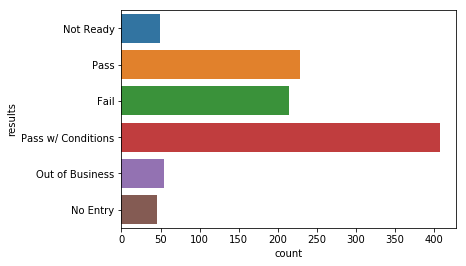

In [10]:
ax = sns.countplot(y="results", data=data)

In [11]:
data['facility_type'].nunique()

37

In [12]:
data['inspection_type'].nunique()

10

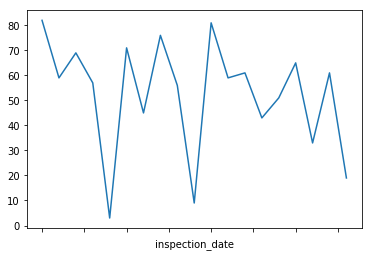

In [13]:
data.groupby('inspection_date').count()['inspection_id'].plot()

In [14]:
data['inspection_type'].value_counts()

Canvass                                   488
License                                   236
Canvass Re-Inspection                     136
Complaint                                  57
License Re-Inspection                      47
Complaint Re-Inspection                    25
Short Form Complaint                        4
Suspected Food Poisoning                    4
Recent Inspection                           2
Suspected Food Poisoning Re-inspection      1
Name: inspection_type, dtype: int64

In [15]:
fail = data[data['results'] == 'fail']
ax = sns.countplot(y="risk", data=fail)

ValueError: min() arg is an empty sequence